<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/DeepLearning/KHF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Python nyelven olvass be öt darab tetszőleges 256x256 pixeles színes képet, jelenítsd meg és jelenítsd meg külön az R, G és B csatornák értékeit hisztogramon. (4p)
2. Csatornánként számold ki a pixelek átlagát és szórását minden képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
3. Olvass be két tetszőleges hangfájlt és jelenítsd meg ezek spektrogramját. (4p)
4. Alakítsd át a spektogramokat 0 várható értékű és 1 szorású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
5. Python scriptből töltsd le a http://smartlab.tmit.bme.hu/oktatas-deep-learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát. (4p)

Importing libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Downloading the images

In [21]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/nature.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Magnus.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/drums.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Craftingtable.png

--2024-09-30 18:53:01--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/nature.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19266 (19K) [image/jpeg]
Saving to: ‘nature.jpg’

nature.jpg          100%[===================>]  18.81K  --.-KB/s    in 0s      

2024-09-30 18:53:01 (58.3 MB/s) - ‘nature.jpg’ saved [19266/19266]

--2024-09-30 18:53:01--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110288 (1

Exercise 1

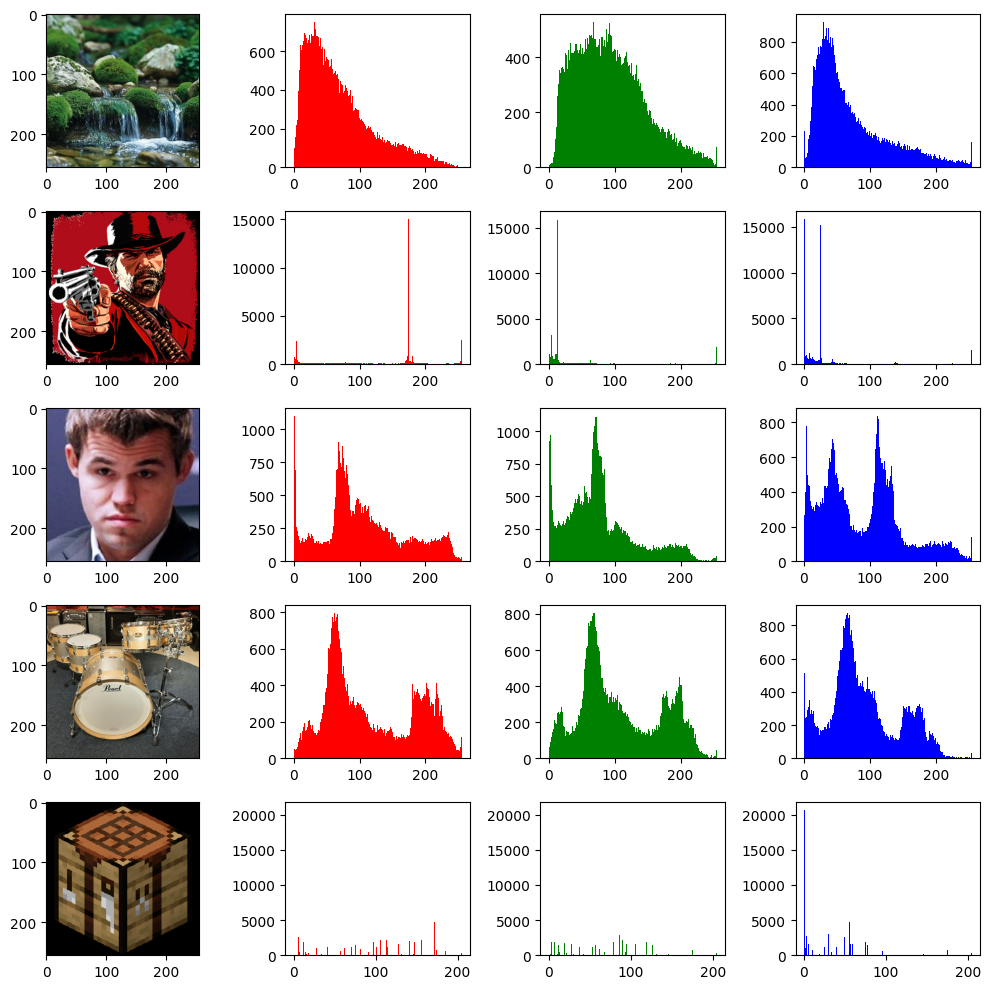

In [29]:
# Reading the images
img1 = cv2.imread("nature.jpg")
img2 = cv2.imread("rdr2.png")
img3 = cv2.imread("Magnus.jpg")
img4 = cv2.imread("drums.png")
img5 = cv2.imread("Craftingtable.png")

# Converting BGR to RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Creating array so we can iterate trough the images
imgs = [img1_rgb, img2_rgb, img3_rgb, img4_rgb, img5_rgb]

# Creating a 5x4 board
fig, axs = plt.subplots(5, 4, figsize=(10, 10))

for i, img in enumerate(imgs):
  # Drawing the image
  axs[i, 0].imshow(img)

  # Getting the red, green and bloe channel values
  red = img[:, :, 0].flatten()
  green = img[:, :, 1].flatten()
  blue = img[:, :, 2].flatten()

  # Drawing the 3 histograms
  axs[i, 1].hist(red, bins=256, color='red')
  axs[i, 2].hist(green, bins=256, color='green')
  axs[i, 3].hist(blue, bins=256, color='blue')

plt.tight_layout()
plt.show()

Exercise 2

In [42]:
# Calculating mean and standard deviation, than normalizing
def normalize(channel):
  mean = np.mean(channel)
  std = np.std(channel)
  normalized = (channel - mean) / std
  return normalized, mean, std

print(f"Image number:\tr_norm\tr_mean\tr_std\r\tr_norm\tr_mean\tr_std\r\tr_norm\tr_mean\tr_std")

for i, img in enumerate(imgs):
  # Normalizing each channel
  r_norm, r_mean, r_std = normalize(img[:, :, 0].flatten())
  g_norm, g_mean, g_std = normalize(img[:, :, 1].flatten())
  b_norm, b_mean, b_std = normalize(img[:, :, 2].flatten())

  # Checking the mean and std of the normalized data
  #print(f"Image {i+1}:\t{r_norm:.2f}\t{r_mean:.3f}\t{r_std:.3f}\r\t{g_norm:.3f}\t{g_mean:.3f}\t{g_std:.3f}\r\t{b_norm:.3f}\t{b_mean:.3f}\t{b_std:.3f}")
  print(f"{r_norm:.2f}")



	r_norm	r_mean	r_std


TypeError: unsupported format string passed to numpy.ndarray.__format__